In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [71]:
df = pd.read_csv('/content/subs.csv',index_col='Date',parse_dates=True)
df.index.freq='D'

In [75]:
df.head()

,Subscribers
Date,
2023-01-01,3875075
2023-01-02,3875775
2023-01-03,3875196
2023-01-04,3874089
2023-01-05,3873962


<Axes: xlabel='Date'>

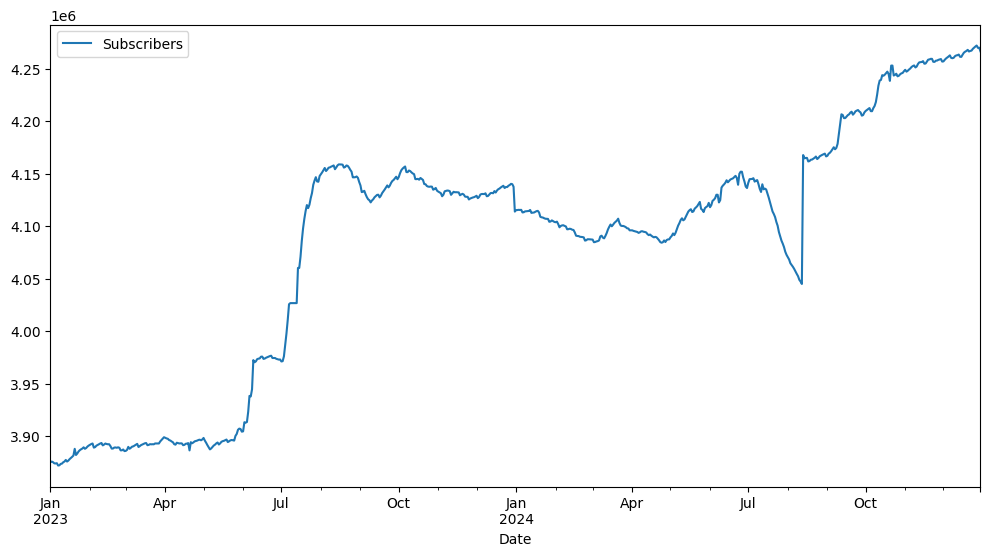

In [108]:
df.plot(figsize=(12,6))

In [77]:
from statsmodels.tsa.seasonal import seasonal_decompose

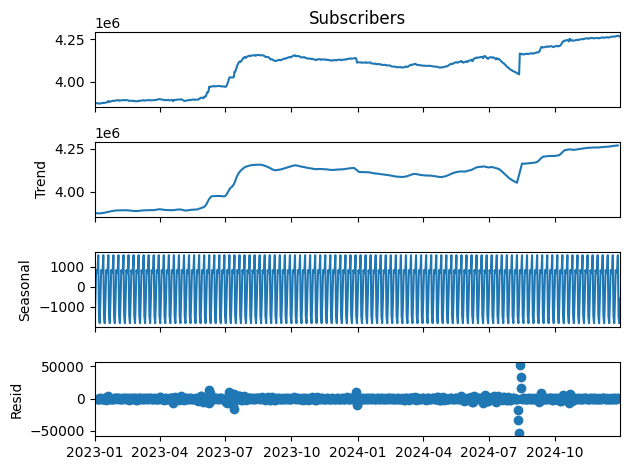

In [109]:
results = seasonal_decompose(df['Subscribers'])
results.plot();

In [80]:
len(df)

730

In [111]:
train = df.iloc[:700]
test = df.iloc[700:]

In [112]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [113]:
df.head(),df.tail()

(            Subscribers
 Date                   
 2023-01-01      3875075
 2023-01-02      3875775
 2023-01-03      3875196
 2023-01-04      3874089
 2023-01-05      3873962,
             Subscribers
 Date                   
 2024-12-26      4270975
 2024-12-27      4271946
 2024-12-28      4269751
 2024-12-29      4269912
 2024-12-30      4266408)

In [114]:
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [145]:
scaled_train[:30]

array([[0.00792741],
       [0.00973496],
       [0.00823986],
       [0.00538134],
       [0.0050534 ],
       [0.00570928],
       [0.        ],
       [0.00056809],
       [0.00397662],
       [0.00469189],
       [0.00802553],
       [0.009846  ],
       [0.01374515],
       [0.00975304],
       [0.01209769],
       [0.01574636],
       [0.01840863],
       [0.02139626],
       [0.02454656],
       [0.04105726],
       [0.02592547],
       [0.02951733],
       [0.03451134],
       [0.03770813],
       [0.03993658],
       [0.04177512],
       [0.04477824],
       [0.04117088],
       [0.04307139],
       [0.04664776]])

In [146]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [147]:
# define generator
n_input = 7
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [148]:
X,y = generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.00792741 0.00973496 0.00823986 0.00538134 0.0050534  0.00570928
 0.        ]
Predict this y: 
 [[0.00056809]]


In [167]:
# We do the same thing, but now instead for 12 day
n_input = 12
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [168]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [169]:
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [170]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_5 (LSTM)                        │ (None, 100)                 │          40,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 40,901 (159.77 KB)

 Trainable params: 40,901 (159.77 KB)

 Non-trainable params: 0 (0.00 B)

In [171]:
# fit model
model.fit(generator,epochs=50)

Epoch 1/50
 20/688 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 0.2717

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


688/688 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - loss: 0.0336
Epoch 2/50
688/688 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - loss: 0.0016
Epoch 3/50
688/688 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 8.4515e-04
Epoch 4/50
688/688 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - loss: 9.3754e-04
Epoch 5/50
688/688 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - loss: 0.0012
Epoch 6/50
688/688 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - loss: 5.1328e-04
Epoch 7/50
688/688 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 6.6617e-04
Epoch 8/50
688/688 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - loss: 2.8597e-04
Epoch 9/50
688/688 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - loss: 6.4127e-04
Epoch 10/50
688/688 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - loss: 7.0955e-04
Epoch 11/50
688/688 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - loss: 5.8386e-04
Epoch 12/50
688/688 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - loss: 3.3867e-04
Epoch 13/50
688/688 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - loss: 3.0189e-04
Epoch 14/50
688/688 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - loss: 4.9699e-04
Epoch 15/50

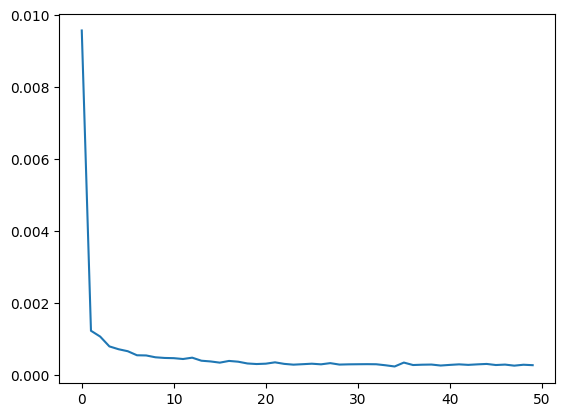

In [155]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [172]:
last_train_batch = scaled_train[-30:]

In [173]:
last_train_batch = last_train_batch.reshape((1, n_input, n_features))

ValueError: cannot reshape array of size 30 into shape (1,12,1)

In [ ]:
model.predict(last_train_batch)

In [ ]:
scaled_test[0]

In [ ]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):

    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]

    # append the prediction into the array
    test_predictions.append(current_pred)

    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [ ]:
test_predictions

In [ ]:
test.head()

In [ ]:
true_predictions = scaler.inverse_transform(test_predictions)

In [ ]:

test['Predictions'] = true_predictions

In [ ]:
test.plot(figsize=(14,5))

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(test['Subscribers'],test['Predictions']))
print(rmse)